In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
import _pickle as pickle

In [2]:
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [3]:
def sort_dict(dct,parameter,order='Ascending'):
    if parameter=='key':
        if(order=='reverse'):
            sorted_tuples = sorted(dct.items(),key=lambda item:item[0],reverse=True)
            return {k:v for k,v in sorted_tuples}
        else:
            sorted_tuples = sorted(dct.items(),key=lambda item:item[0])
            return {k:v for k,v in sorted_tuples}
    else:
        if(order=='reverse'):
            sorted_tuples = sorted(dct.items(),key=lambda item:item[1],reverse=True)
            return {k:v for k,v in sorted_tuples}
        else:
            sorted_tuples = sorted(dct.items(),key=lambda item:item[1])
            return {k:v for k,v in sorted_tuples}

In [4]:
df = pd.read_csv('Merged_Database.csv')

In [5]:
df.head()

,Unnamed: 0,Authors,Title,Year,Cited by,Country
0,0,"Soares, J.V.B., Leandro, J.J.G., Cesar Jr., R....",Retinal vessel segmentation using the 2-D Gabo...,2006,1083.0,Australia
1,1,"Scarselli, F., Gori, M., Tsoi, A.C., Hagenbuch...",The graph neural network model,2009,1031.0,Australia
2,2,"Karantonis, D.M., Narayanan, M.R., Mathie, M.,...",Implementation of a real-time human movement c...,2006,908.0,Australia
3,3,"Mirjalili, S.",Dragonfly algorithm: a new meta-heuristic opti...,2016,865.0,Australia
4,4,"Naseem, I., Togneri, R., Bennamoun, M.",Linear regression for face recognition,2010,768.0,Australia


In [6]:
df.shape

(67694, 6)

In [7]:
df.drop('Unnamed: 0',axis='columns',inplace=True)

In [8]:
df.rename(columns={'Cited by':'Cited_by'},inplace=True)

# Reading Previously Created Authors list

In [9]:
set_authors = []
with open('Authors_list.txt','r') as filehandle:
    filecontents = filehandle.readlines()

    for line in filecontents:
        # remove linebreak which is the last character of the string
        author = line[:-1]

        # add item to the list
        set_authors.append(author)
filehandle.close()

In [10]:
len(set_authors)

103409

# Reading Previously Created Author:Database Dictonary

In [11]:
dct_author_database = {}
with open('Author_database_dictonary.txt','rb') as file:
    dct_author_database = pickle.load(file)
file.close()

In [12]:
print(set_authors[0])
dct_author_database[set_authors[0]]

Soares, J.V.B.


,Authors,Title,Year,Cited_by
0,"Jelinek, H.F., Cree, M.J., Leandro, J.J.G., So...",Automated segmentation of retinal blood vessel...,2007,47.0


# a) Highest cited author and his h-index (from the world)


In [13]:
author_with_highest_citations = ""
max_citations = 0
for author in set_authors:
    cites = dct_author_database[author]['Cited_by'].sum()
    if max_citations<cites:
        author_with_highest_citations = author
        max_citations = cites
        print(f'{author_with_highest_citations}                 \t\t{cites}')


Soares, J.V.B.                 		47.0
Cree, M.J.                 		182.0
Karantonis, D.M.                 		908.0
Legg, S.                 		7346.0
Roweis, S.T.                 		10484.0


In [14]:
print(author_with_highest_citations)
dct_author_database[author_with_highest_citations]

Roweis, S.T.


,Authors,Title,Year,Cited_by
0,"Roweis, S.T., Saul, L.K.",Nonlinear dimensionality reduction by locally ...,2000,10484.0


# b) Highest publication author

In [15]:
author_with_highest_publication = ""
max_publication_count = 0
for author in set_authors:
    rows, columsn = dct_author_database[author].shape
    if rows>max_publication_count:
        max_publication_count=rows
        author_with_highest_publication = author
        print(f'{author}                    \t{rows}')

Soares, J.V.B.                    	1
Dissanayake, S.D.                    	2
Yang, Y.                    	3
Liu, Y.                    	4
Abbot, J.                    	6
Nissan, E.                    	20
Yager, R.R.                    	22


In [16]:
print(f'Author\t\t= {author_with_highest_publication}\nPublications\t= {max_publication_count}')
dct_author_database[author_with_highest_publication]

Author		= Yager, R.R.
Publications	= 22


,Authors,Title,Year,Cited_by
0,"Yager, R.R.",OWA aggregation over a continuous interval arg...,2004,355.0
1,"Yager, R.R.",A Model of Participatory Learning,1990,112.0
2,"Yager, R.R.",Modeling prioritized multicriteria decision ma...,2004,105.0
3,"Yager, R.R.",On prioritized multiple-criteria aggregation,2012,38.0
4,"Yager, R.R.",On the aggregation of prioritized belief struc...,1996,35.0
5,"Yager, R.R.",Multi-Criteria Decision Making with Interval C...,2018,21.0
6,"Yager, R.R.",Exponential smoothing with credibility weighte...,2013,21.0
7,"Yager, R.R.",Set measure directed multi-source information ...,2011,21.0
8,"Yager, R.R.",Cumulative distribution functions from Dempste...,2004,19.0
9,"Yager, R.R.",OWA aggregation of multi-criteria with mixed u...,2017,18.0


# c) Highest cited authors avg. citations, and the country name.

In [17]:
df[df.Authors=='Roweis, S.T., Saul, L.K.']

,Authors,Title,Year,Cited_by,Country
52596,"Roweis, S.T., Saul, L.K.",Nonlinear dimensionality reduction by locally ...,2000,10484.0,United Kingdom


# d) Total number of publications of the highest cited author


In [18]:
dct_author_database[author_with_highest_citations]

,Authors,Title,Year,Cited_by
0,"Roweis, S.T., Saul, L.K.",Nonlinear dimensionality reduction by locally ...,2000,10484.0


# e) Total publication in year

In [19]:
year_lst = sorted(list(df['Year'].unique()))
country_lst = list(df['Country'].unique())

In [20]:
df_without_duplicates = df.drop_duplicates(subset=['Authors','Title'],keep=False)

In [21]:
dct_df_per_year_publications = {}
for year in year_lst:
    dct_df_per_year_publications[year] = df_without_duplicates[df_without_duplicates.Year==year].size

In [22]:
sorted_tuples = sorted(dct_df_per_year_publications.items(),key=lambda item: item[1],reverse=True)
dct_df_per_year_publications = sort_dict(dct_df_per_year_publications,'Values','reverse')
dct_df_per_year_publications

{2020: 26045,
 2019: 20050,
 2018: 17290,
 2016: 14320,
 2014: 13600,
 2015: 13590,
 2017: 13010,
 2021: 11045,
 2004: 10095,
 2013: 9985,
 2012: 8880,
 2008: 8680,
 2009: 7035,
 2011: 6920,
 2010: 6830,
 2006: 6495,
 2007: 6410,
 2003: 6205,
 2005: 6085,
 2000: 3650,
 1989: 3550,
 2001: 3390,
 1999: 3370,
 1996: 3350,
 1994: 3320,
 1997: 3300,
 2002: 3230,
 1998: 3165,
 1995: 2875,
 1988: 2630,
 1993: 2330,
 1990: 2230,
 1991: 1915,
 1987: 1715,
 1992: 1715,
 1986: 825,
 1985: 580,
 1984: 345,
 1983: 125,
 1982: 110,
 1977: 85,
 1980: 65,
 1973: 60,
 1979: 60,
 1978: 55,
 1981: 55,
 1975: 40,
 1976: 40,
 1971: 35,
 1974: 35,
 1972: 30,
 1970: 15,
 1962: 5,
 1963: 5,
 1964: 5,
 1965: 5,
 1968: 5,
 1969: 5}

# f) Total citation per year

In [23]:
dct_citations_per_year = {}
for year in year_lst:
    dct_citations_per_year[year] = df_without_duplicates[df_without_duplicates.Year==year]['Cited_by'].sum()

dct_citations_per_year = sort_dict(dct_citations_per_year,'Values','reverse')

In [24]:
dct_citations_per_year

{2008: 72153.0,
 2016: 68582.0,
 2015: 65703.0,
 2004: 65655.0,
 2005: 63808.0,
 2007: 63744.0,
 2006: 62083.0,
 2014: 55862.0,
 2009: 54844.0,
 2013: 52958.0,
 2018: 50631.0,
 2017: 48559.0,
 2010: 47879.0,
 2012: 47357.0,
 2011: 47062.0,
 2000: 34461.0,
 2019: 32440.0,
 2003: 28217.0,
 1999: 25158.0,
 2002: 23036.0,
 2001: 22792.0,
 1998: 22509.0,
 1997: 19356.0,
 1995: 18297.0,
 1994: 17722.0,
 2020: 15534.0,
 1996: 13252.0,
 1989: 10435.0,
 1990: 9642.0,
 1992: 9511.0,
 1988: 8375.0,
 1993: 8149.0,
 1991: 7036.0,
 1987: 5272.0,
 1986: 3652.0,
 1980: 2616.0,
 1985: 1915.0,
 1977: 1644.0,
 2021: 1012.0,
 1979: 997.0,
 1984: 789.0,
 1971: 446.0,
 1973: 256.0,
 1976: 215.0,
 1983: 208.0,
 1982: 202.0,
 1975: 186.0,
 1978: 144.0,
 1970: 83.0,
 1981: 76.0,
 1972: 49.0,
 1974: 30.0,
 1963: 17.0,
 1962: 16.0,
 1969: 4.0,
 1964: 2.0,
 1965: 2.0,
 1968: 0.0}

# g) Author(country) having highest co-authorship with indian authors.

# h) Highest cited author from India and the university

In [25]:
max_citation_from_india = df[df.Country=='India']['Cited_by'].max()

In [26]:
df[df.Cited_by==max_citation_from_india]

,Authors,Title,Year,Cited_by,Country
23567,"Jayadeva, Khemchandani, R., Chandra, S.",Twin support vector machines for pattern class...,2007,958.0,India


# i) Comparative year wise article publication analysis of India, China and USA


In [27]:
df_india = df[df.Country=='India'].copy().reset_index(drop=True)
df_china = df[df.Country=='China'].copy().reset_index(drop=True)
df_usa = df[df.Country=='United States'].copy().reset_index(drop=True)

In [28]:
dct_india_year_publications = {}
dct_china_year_publications = {}
dct_usa_year_publications = {}
for year in year_lst:
    dct_india_year_publications[year] = df_india[df_india.Year==year].size
    dct_china_year_publications[year] = df_china[df_china.Year==year].size
    dct_usa_year_publications[year] = df_usa[df_usa.Year==year].size

## Comparative analysis using graph

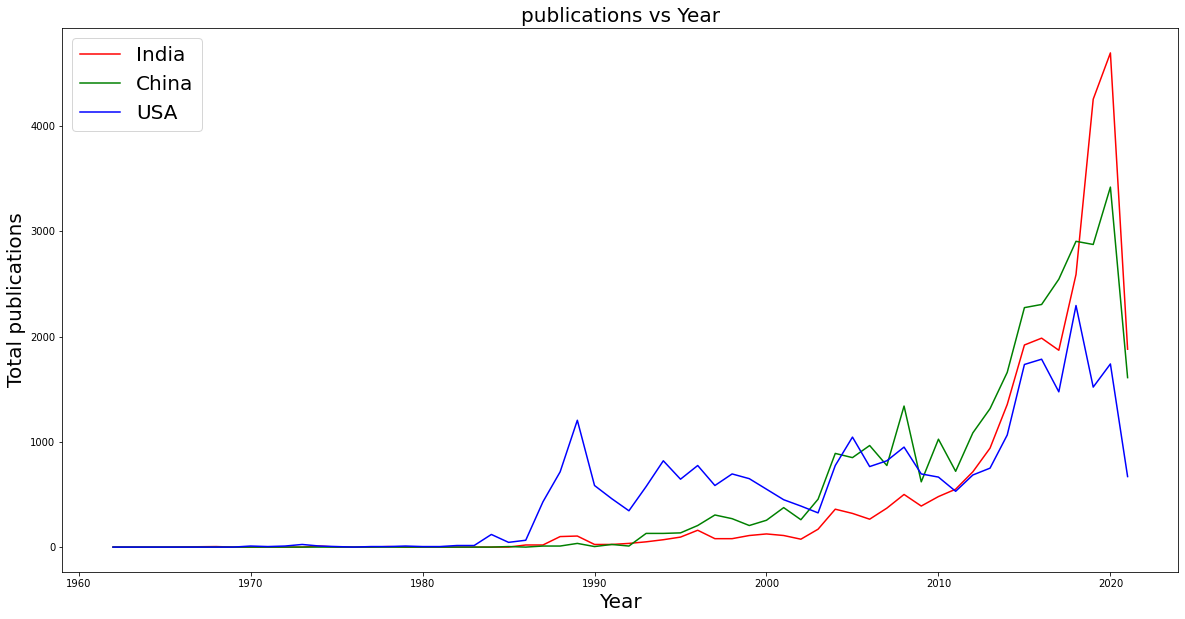

In [34]:
fig = plt.figure(figsize=[20,10])

plt.plot(list(dct_india_year_publications.keys()),list(dct_india_year_publications.values()),label='India',color='r')
plt.plot(list(dct_china_year_publications.keys()),list(dct_china_year_publications.values()),label='China',color='g')
plt.plot(list(dct_usa_year_publications.keys()),list(dct_usa_year_publications.values()),label='USA',color='b')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total publications',fontsize=20)
plt.title('publications vs Year',fontsize=20)
plt.legend(loc='upper left',fontsize=20)
plt.show()

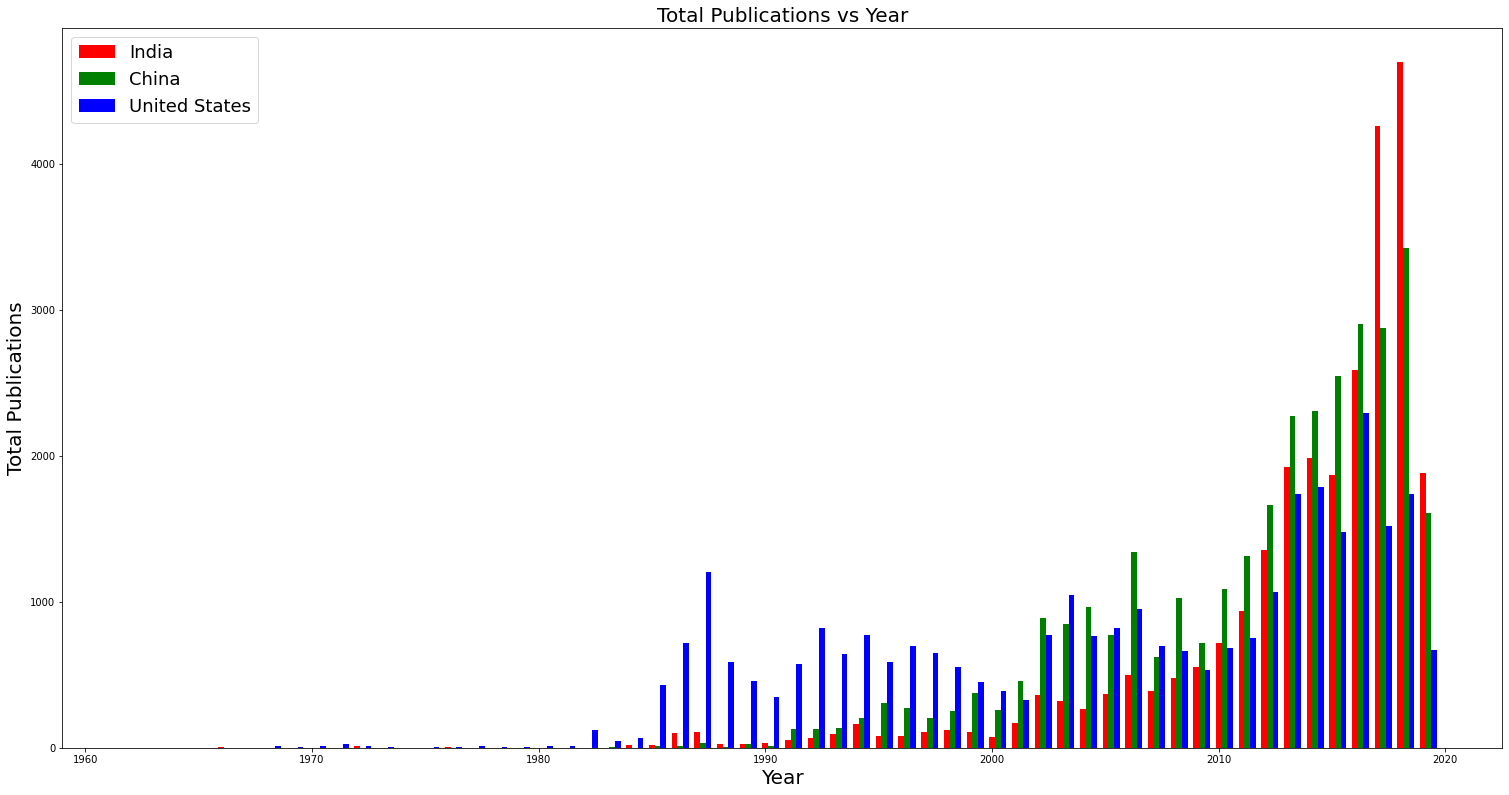

In [30]:
# plt.rcParams['figure.figsize'] = [20,10]
fig = plt.figure(figsize=[20,10])

X = np.arange(len(year_lst))
X = X + year_lst[0]
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, list(dct_india_year_publications.values()),  label='India',          color='r',  width =0.25)
ax.bar(X + 0.25, list(dct_china_year_publications.values()),  label='China',          color='g',  width =0.25)
ax.bar(X + 0.50, list(dct_usa_year_publications.values()),    label='United States',  color='b',  width =0.25)
ax.legend(loc='upper left',fontsize=18)
plt.title('Total Publications vs Year',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Total Publications',fontsize=20)
plt.show()

# j) Total number of grants given to the field


# k) Country wise total number of publication


In [31]:
dct_country_publications = {}
for country in country_lst:
    rows, columns = df[df.Country==country].shape
    dct_country_publications[country] = rows

In [32]:
sorted_tuples = sorted(dct_country_publications.items(), key =lambda item: item[1], reverse = True)
dct_country_publications = {k:v for k,v in sorted_tuples}

In [33]:
dct_country_publications

{'United Kingdom': 8994,
 'China': 6401,
 'United States': 6104,
 'India': 5383,
 'Germany': 5186,
 'Spain': 4759,
 'Canada': 4486,
 'Japan': 4324,
 'Italy': 4214,
 'France': 4133,
 'Australia': 3361,
 'South Korea': 3026,
 'Iran': 2720,
 'Taiwan': 2430,
 'Netherlands': 2173}